Tugas Akhir : 

### Analisis Sentimen Mitra untuk Telkom University Pada Media Sosial Twitter Menggunakan Algoritma Decision Tree (CART)

Sean Akbar Ryanto (1301180258)

# Library Package

## Install Library

In [1]:
# Library package untuk preprocessing stopwords removal dan stemming
!pip install PySastrawi
!pip install -U nltk
!pip install googletrans==3.1.0a0
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Library

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Sentimen

## Read Data

In [3]:
data = pd.read_csv('Dataset Internal Labelled.csv')
data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,1
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",0
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,0
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,1
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",1
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,0
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,0
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",0
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,0


In [4]:
data['Sentiment'].replace(to_replace = -1, value = 'negatif', inplace=True)
data['Sentiment'].replace(to_replace = 0, value = 'netral', inplace=True)
data['Sentiment'].replace(to_replace = 1, value = 'positif', inplace=True)

data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,positif
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,positif
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,netral
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",netral
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,netral


Text(0.5, 0, 'Sentimen')

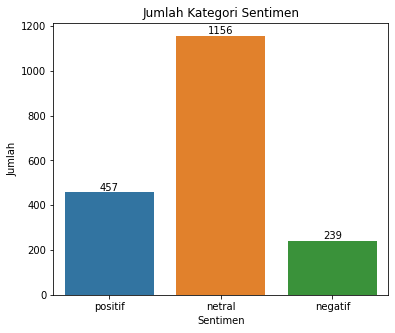

In [5]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(x='Sentiment', data=data)
ax.bar_label(ax.containers[0])
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

In [6]:
data['Sentiment'].value_counts()

netral     1156
positif     457
negatif     239
Name: Sentiment, dtype: int64

In [7]:
# Menyalin data yang dimiliki kedalam variabel lain
sentimen1 = data.copy()

## Translate Data

In [8]:
# from googletrans import Translator

# translator = Translator()

In [9]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(translator.translate, src='en', dest='id')

In [10]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(getattr, args=('text',))

# sentimen1

# Pre-Processing

## Data Cleaning

In [11]:
# Fungsi untuk menghapus kata atau karakter unik
def remove_special(x):
    # remove tab, new line, ans back slice
    x = x.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    x = x.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    # x = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ",x).split())
    # remove number
    x = re.sub(r"\d+", "", x)
    # remove punctuation
    x = "".join([i for i in x if i not in string.punctuation])
    # remove single char
    # x = re.sub(r"\b[a-zA-Z]\b", "", x)
    # remove incomplete URL
    # x = x.replace("http://", " ").replace("https://", " ")
    # remove whitespace
    x = x.strip()
    return x

# Menghapus kata/karakter unik pada data yang dimiliki
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(lambda x:remove_special(x))

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan Pada sharing kali...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak Okta P...,netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,Alumni Sharing Chapter Industry amp Campus Hir...,positif
4,telucareer,CAE di tahun kamu tetap diperbolehkan mendaft...,positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,MAIN EVENT IFEST Akhirnya yang ditunggutungg...,netral
1849,infounivtelkom,InfoEvent MAIN EVENT COMPFEST Halo Igniters ...,netral
1850,infounivtelkom,InfoEvent MANIFESTASI R E T R O S P E C T I...,netral


## Case Folding

In [12]:
# Mengubah seluruh teks menjadi huruf kecil
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].str.lower()

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak tasha maric tan pada sharing kali...,positif
1,telucareer,bekerja diperusahaan tersebut yaitu kak okta p...,netral
2,telucareer,cti group adalah perusahaan it yang mendistrib...,netral
3,telucareer,alumni sharing chapter industry amp campus hir...,positif
4,telucareer,cae di tahun kamu tetap diperbolehkan mendaft...,positif
...,...,...,...
1847,infounivtelkom,telkom university badminton club dengan bangga...,netral
1848,infounivtelkom,main event ifest akhirnya yang ditunggutungg...,netral
1849,infounivtelkom,infoevent main event compfest halo igniters ...,netral
1850,infounivtelkom,infoevent manifestasi r e t r o s p e c t i...,netral


## Remove Emoji

In [13]:
# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(deEmojify)

# sentimen1

## Tokenization

In [14]:
# Fungsi untuk memecah kalimat pada dataframe menjadi per kata tiap barisnya
def word_tokenized(x):
  return word_tokenize(x)

# Menginisialisasikan fungsi tokenisasi yang telah dibuat ke data
sentimen1['Text Tweet']= sentimen1['Text Tweet'].apply(word_tokenized)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[bersama, kak, tasha, maric, tan, pada, sharin...",positif
1,telucareer,"[bekerja, diperusahaan, tersebut, yaitu, kak, ...",netral
2,telucareer,"[cti, group, adalah, perusahaan, it, yang, men...",netral
3,telucareer,"[alumni, sharing, chapter, industry, amp, camp...",positif
4,telucareer,"[cae, di, tahun, kamu, tetap, diperbolehkan, m...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, university, badminton, club, dengan, ...",netral
1848,infounivtelkom,"[main, event, ifest, akhirnya, yang, ditunggut...",netral
1849,infounivtelkom,"[infoevent, main, event, compfest, halo, ignit...",netral
1850,infounivtelkom,"[infoevent, manifestasi, r, e, t, r, o, s, p, ...",netral


## Normalisasi

In [15]:
# Download data KBBI untuk normalisasi
!wget 'https://drive.google.com/uc?export=download&id=1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG' -O kbba.txt
!wget 'https://drive.google.com/uc?export=download&id=14M_Vi-ySjezLMXgFGThjWxerSixowes_' -O kbba_extend.txt

--2022-07-15 07:12:59--  https://drive.google.com/uc?export=download&id=1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG
Resolving drive.google.com (drive.google.com)... 74.125.195.139, 74.125.195.102, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nmgbi20701gg80qq267ndbstc7eghf1k/1657869150000/00150260977202157621/*/1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG?e=download&uuid=cd4060ee-07bf-4459-9043-161b22f8d59e [following]
--2022-07-15 07:12:59--  https://doc-0s-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nmgbi20701gg80qq267ndbstc7eghf1k/1657869150000/00150260977202157621/*/1pdvzHGWmnRci3FSWnzF30xMLhG1R8GnG?e=download&uuid=cd4060ee-07bf-4459-9043-161b22f8d59e
Resolving doc-0s-14-docs.googleusercontent.com (doc-0s-14-docs.googleusercontent.com)... 74.125.142.132, 2607:

In [16]:
normalized_word = pd.read_csv("new_kamusalay.csv", encoding='latin-1')

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(normalized_term)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[bersama, kak, tasha, maric, tan, pada, sharin...",positif
1,telucareer,"[bekerja, diperusahaan, tersebut, yaitu, kak, ...",netral
2,telucareer,"[cti, grup, adalah, perusahaan, it, yang, mend...",netral
3,telucareer,"[alumni, sharing, chapter, industri, amp, kamp...",positif
4,telucareer,"[cae, di, tahun, kamu, tetap, diperbolehkan, m...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, dengan,...",netral
1848,infounivtelkom,"[main, acara, ifest, akhirnya, yang, ditunggut...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, halo, ignit...",netral
1850,infounivtelkom,"[infoevent, manifestasi, r, e, t, r, o, si, p,...",netral


## Stopword Removal

In [17]:
# Download daftar stopwords tambahan
!wget 'https://drive.google.com/uc?export=download&id=10N-yYkDUReG53SXJrghX1kcJs2_fiB3P' -O stop_new2.txt

--2022-07-15 07:13:01--  https://drive.google.com/uc?export=download&id=10N-yYkDUReG53SXJrghX1kcJs2_fiB3P
Resolving drive.google.com (drive.google.com)... 74.125.195.139, 74.125.195.102, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qfs5lu3t4lhccnl306s7ab4bip9v3i89/1657869150000/00150260977202157621/*/10N-yYkDUReG53SXJrghX1kcJs2_fiB3P?e=download&uuid=b4744d2d-cf9d-455e-85df-35384ab7c1f6 [following]
--2022-07-15 07:13:02--  https://doc-04-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qfs5lu3t4lhccnl306s7ab4bip9v3i89/1657869150000/00150260977202157621/*/10N-yYkDUReG53SXJrghX1kcJs2_fiB3P?e=download&uuid=b4744d2d-cf9d-455e-85df-35384ab7c1f6
Resolving doc-04-14-docs.googleusercontent.com (doc-04-14-docs.googleusercontent.com)... 74.125.142.132, 2607:

In [18]:
# Menginisialisasikan Sastrawi
factory = StopWordRemoverFactory()
list_stopwords = factory.get_stop_words()
list_stopwords2 = stopwords.words('indonesian')

# Menambahkan data stopwords
list_stopwords.extend(['kak', 'gwa', 'ayo', 'banget', 'indonesia','indihome', 
                       'pas', 'iya', 'ya', 'sih', 'deh', 'loh', 
                       'oiya','nih', 'ok', 'ah','gua','lg',
                       "yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'ucl','kali'
                       'kalo', 'amp', 'biar', 'bikin', 'bilang','mlu','gni' 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'by'
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't','ca', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','ke','di','ini','mah'])

txt_stopword = pd.read_csv('stopword.csv', names= ["stopwords"], header = None)

list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

list_stopwords = set(list_stopwords)

# Fungsi untuk menghapus kata yang tidak diperlukan
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

def stopwords_removal2(words):
    return [word for word in words if word not in list_stopwords2]

# Menginisialisasikan fungsi stopwords_removal yang telah dibuat ke data yang dimiliki
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(stopwords_removal)
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(stopwords_removal2)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[tasha, maric, tan, sharing, informasi, lengka...",positif
1,telucareer,"[diperusahaan, okta, puspita, tim, leader, of,...",netral
2,telucareer,"[cti, grup, perusahaan, it, mendistribusikan, ...",netral
3,telucareer,"[alumni, sharing, chapter, industri, kampus, h...",positif
4,telucareer,"[cae, diperbolehkan, mendaftar, mendaftar, dih...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, bangga,...",netral
1848,infounivtelkom,"[main, acara, ifest, ditunggutunggu, yuk, ajak...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, igniters, p...",netral
1850,infounivtelkom,"[infoevent, manifestasi, si, finally, the, wev...",netral


## Stemming

In [19]:
# Menginisialisasikan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengubah seluruh kata pada dataframe menjadi kata dasar
sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(lambda x: [stemmer.stem(y) for y in x])

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,"[tasha, maric, tan, sharing, informasi, lengka...",positif
1,telucareer,"[usaha, okta, puspita, tim, leader, of, techni...",netral
2,telucareer,"[cti, grup, usaha, it, distribusi, merek, tekn...",netral
3,telucareer,"[alumni, sharing, chapter, industri, kampus, h...",positif
4,telucareer,"[cae, boleh, daftar, daftar, hubung, admin, pe...",positif
...,...,...,...
1847,infounivtelkom,"[telkom, universitas, badminton, club, bangga,...",netral
1848,infounivtelkom,"[main, acara, ifest, ditunggutunggu, yuk, ajak...",netral
1849,infounivtelkom,"[infoevent, main, acara, compfest, igniters, p...",netral
1850,infounivtelkom,"[infoevent, manifestasi, si, finally, the, wev...",netral


## Untokenization

In [20]:
#Menggabungkan kembali kata kata yang telah dipecah menjadi 1 kalimat
def untokenize(words):
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(untokenize)

sentimen1

,Username,Text Tweet,Sentiment
0,telucareer,tasha maric tan sharing informasi lengkap lowo...,positif
1,telucareer,usaha okta puspita tim leader of technical net...,netral
2,telucareer,cti grup usaha it distribusi merek teknologi i...,netral
3,telucareer,alumni sharing chapter industri kampus hiring ...,positif
4,telucareer,cae boleh daftar daftar hubung admin perihal j...,positif
...,...,...,...
1847,infounivtelkom,telkom universitas badminton club bangga semba...,netral
1848,infounivtelkom,main acara ifest ditunggutunggu yuk ajak teman...,netral
1849,infounivtelkom,infoevent main acara compfest igniters pasti h...,netral
1850,infounivtelkom,infoevent manifestasi si finally the weve been...,netral


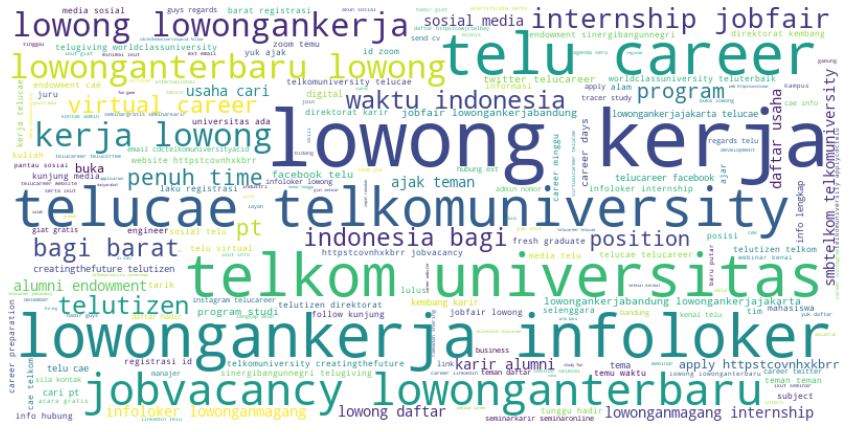

In [21]:
# Start with one review:
all_data = pd.DataFrame(' '.join(sentimen1['Text Tweet'].tolist()), columns=['Text Tweet'], index=[0])
text = all_data['Text Tweet'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Oversampling

In [22]:
x_imb = sentimen1['Text Tweet']
y_imb = sentimen1['Sentiment'] 

In [27]:
x_imb = x_imb.values.reshape(-1, 1)

In [29]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(sampling_strategy='minority')
x_os, y_os = ros.fit_resample(x_imb, y_imb)
x_os, y_os = ros.fit_resample(x_os, y_os)

In [30]:
Counter(y_os)

Counter({'negatif': 1156, 'netral': 1156, 'positif': 1156})

Text(0.5, 0, 'Sentimen')

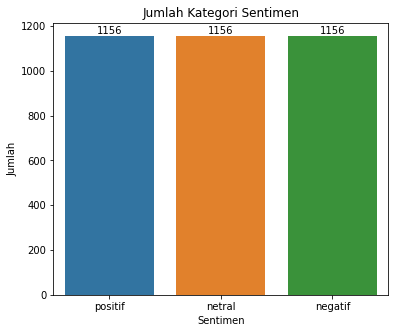

In [31]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(x=y_os, data=sentimen1)
ax.bar_label(ax.containers[0])
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

# Data Splitting

In [32]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 80:20
x1 = x_os.flatten()
y1 = y_os

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20 , shuffle=True, random_state=123)

In [33]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 75:25
x2 = x_os.flatten()
y2 = y_os

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25 , shuffle=True, random_state=123)

In [34]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 70:30
x3 = x_os.flatten()
y3 = y_os

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30 , shuffle=True, random_state=123)

# Feature Extraction TF-IDF (80:20)

## Proses Pembobotan TF-IDF

In [35]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x1_train_tfidf = vector.transform(x1_train.astype(str))
x1_test_tfidf = vector.transform(x1_test)

## Hasil Pembobotan TF-IDF

In [36]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x1_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
5588,telucae,0.058423
5583,telkomuniversity,0.057998
3701,lowong,0.047297
3173,jobfair,0.031633
3341,kerja,0.029338
...,...,...
2799,httpstcozntwbvaxf,0.000000
2797,httpstcozmxhufhh,0.000000
2784,httpstcozhrsaeye,0.000000
2778,httpstcozexbyfyxwd,0.000000


In [37]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x1_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
5588,telucae,0.054217
5583,telkomuniversity,0.053487
3701,lowong,0.045006
3173,jobfair,0.030255
3714,lowongankerjajakarta,0.029069
...,...,...
1857,httpstcobrlckhawo,0.000000
1854,httpstcobpecalxwn,0.000000
1853,httpstcoboztxqzp,0.000000
1852,httpstcoboghhfxjk,0.000000


# Feature Extraction TF-IDF (75:25)

## Proses Pembobotan TF-IDF

In [38]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x2_train_tfidf = vector.transform(x2_train.astype(str))
x2_test_tfidf = vector.transform(x2_test)

## Hasil Pembobotan TF-IDF

In [39]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x2_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
5588,telucae,0.058122
5583,telkomuniversity,0.057732
3701,lowong,0.047701
3173,jobfair,0.031420
3341,kerja,0.029464
...,...,...
5523,tau,0.000000
2855,ideabakers,0.000000
2828,hum,0.000000
2816,httpstcozytonvjvk,0.000000


In [40]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x2_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
5588,telucae,0.055961
5583,telkomuniversity,0.055184
3701,lowong,0.044250
3173,jobfair,0.031169
3714,lowongankerjajakarta,0.030463
...,...,...
3975,mirza,0.000000
2007,httpstcofzatfr,0.000000
2005,httpstcofylakecm,0.000000
2004,httpstcofyialoit,0.000000


# Feature Extraction TF-IDF (70:30)

## Proses Pembobotan TF-IDF

In [41]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x3_train_tfidf = vector.transform(x3_train.astype(str))
x3_test_tfidf = vector.transform(x3_test)

## Hasil Pembobotan TF-IDF

In [42]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x3_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
5588,telucae,0.058890
5583,telkomuniversity,0.058523
3701,lowong,0.048477
3173,jobfair,0.031624
3341,kerja,0.029955
...,...,...
2797,httpstcozmxhufhh,0.000000
2792,httpstcozldpyyeky,0.000000
2784,httpstcozhrsaeye,0.000000
2782,httpstcozgckpco,0.000000


In [43]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x3_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
5588,telucae,0.054532
5583,telkomuniversity,0.053768
3701,lowong,0.043017
3173,jobfair,0.030735
3714,lowongankerjajakarta,0.028928
...,...,...
2131,httpstcojjdiuia,0.000000
2130,httpstcojjaxkfoqoh,0.000000
2129,httpstcojjajekck,0.000000
4172,nyata,0.000000


# Klasifikasi

In [44]:
# Library package untuk evaluasi model dengan nilai akurasi
from sklearn.metrics import accuracy_score

# Library package untuk evaluasi keseluruhan performa model
from sklearn.metrics import classification_report

## Hyperparameter Tuning GridSearchCV (80:20)

In [82]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV    # Library package untuk menggunakan validasi GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf1 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf1.fit(x1_train_tfidf, y1_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf1.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'best'}


In [83]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf1.best_score_)

accuracy :  0.7627977040750072


### Decision Tree 80:20

In [95]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=29)
dt_clf1.fit(x1_train_tfidf, y1_train)

# Memprediksi label sentimen dengan data validasi
dt_predict1 = dt_clf1.predict(x1_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict1, y1_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict1, y1_test, digits=4))

Decision Tree Accuracy Score: 76.2248 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.8178    0.9583    0.8825       192
      netral     0.5378    0.9014    0.6737       142
     positif     0.9394    0.6028    0.7343       360

    accuracy                         0.7622       694
   macro avg     0.7650    0.8208    0.7635       694
weighted avg     0.8236    0.7622    0.7629       694



## Confusion Matrix 80:20

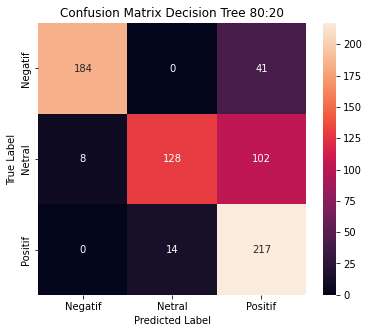

In [96]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y1_test, dt_predict1)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 80:20", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (75:25)

In [49]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf2 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf2.fit(x2_train_tfidf, y2_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf2.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'best'}


In [50]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf2.best_score_)

accuracy :  0.7704804008252284


### Decision Tree 75:25

In [51]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=29)
dt_clf2.fit(x2_train_tfidf, y2_train)

# Memprediksi label sentimen dengan data validasi
dt_predict2 = dt_clf2.predict(x2_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict2, y2_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict2, y2_test, digits=4))

Decision Tree Accuracy Score: 77.0473 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.8136    0.9619    0.8816       236
      netral     0.5772    0.9005    0.7035       191
     positif     0.9276    0.6114    0.7370       440

    accuracy                         0.7705       867
   macro avg     0.7728    0.8246    0.7740       867
weighted avg     0.8194    0.7705    0.7690       867



## Confusion Matrix Decision Tree 75:25

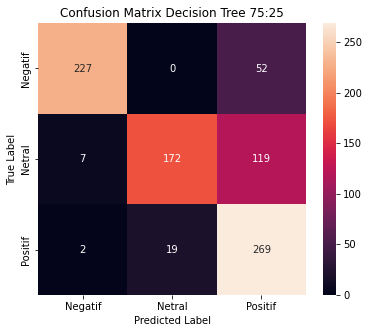

In [52]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y2_test, dt_predict2)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 75:25", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (70:30)

In [53]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf3 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf3.fit(x3_train_tfidf, y3_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf3.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'best'}


In [54]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf3.best_score_)

accuracy :  0.765137911097507


### Decision Tree 70:30

In [99]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=29)
dt_clf3.fit(x3_train_tfidf, y3_train)

# Memprediksi label sentimen dengan data validasi
dt_predict3 = dt_clf3.predict(x3_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict3, y3_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict3, y3_test, digits=4))

Decision Tree Accuracy Score: 76.7531 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.8198    0.9579    0.8835       285
      netral     0.5565    0.8955    0.6864       220
     positif     0.9294    0.6138    0.7393       536

    accuracy                         0.7675      1041
   macro avg     0.7686    0.8224    0.7697      1041
weighted avg     0.8206    0.7675    0.7676      1041



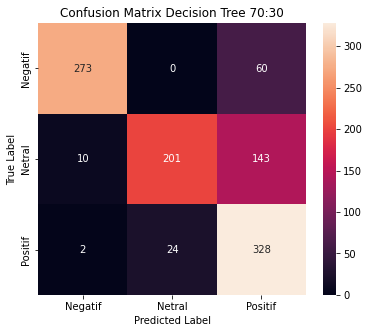

In [56]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y3_test, dt_predict3)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 70:30", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()